# Estimando Emissões de CO₂ de Data Centers no Brasil

### Integrantes: 
- Diego Paz Oliveira Morais 
- Sergio Augusto de Araújo 
- Ary Paulo Wiese Neto 
- Pedro Henrique Sousa dos Santos 

### Monitor:
- Gabriel Brito de França

### Objetivo geral:  
Desenvolver um estimador exploratório (aplicação simples) que calcule emissões operacionais de CO₂ associadas ao consumo elétrico de data centers e aplicar o estimador a cenários do Brasil

## O Projeto

### Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

Vamos usar a planilha 'Fatores de emissão simples ajustado - Cálculos de 2024.xlsx' disponivel em [Fatores de emissão](https://www.gov.br/mcti/pt-br/acompanhe-o-mcti/sirene/dados-e-ferramentas/fatores-de-emissao)  
Pegamos os dados dos Fatores de emissão de CO2 da margem de operação pelo método simples ajustado (tCO2/MWh) e convertemos para o arquivo [fatores_emissao.csv](input/fatores_emissao.csv)

In [ ]:
# para exibir os dados do arquivo Fatores de emissão
df = pd.read_csv("input/fatores_emissao.csv")
print(df.head(3))

    ano  fator_emissao_tCO2_MWh
0  2006                  0.3355
1  2007                  0.3227
2  2008                  0.3531


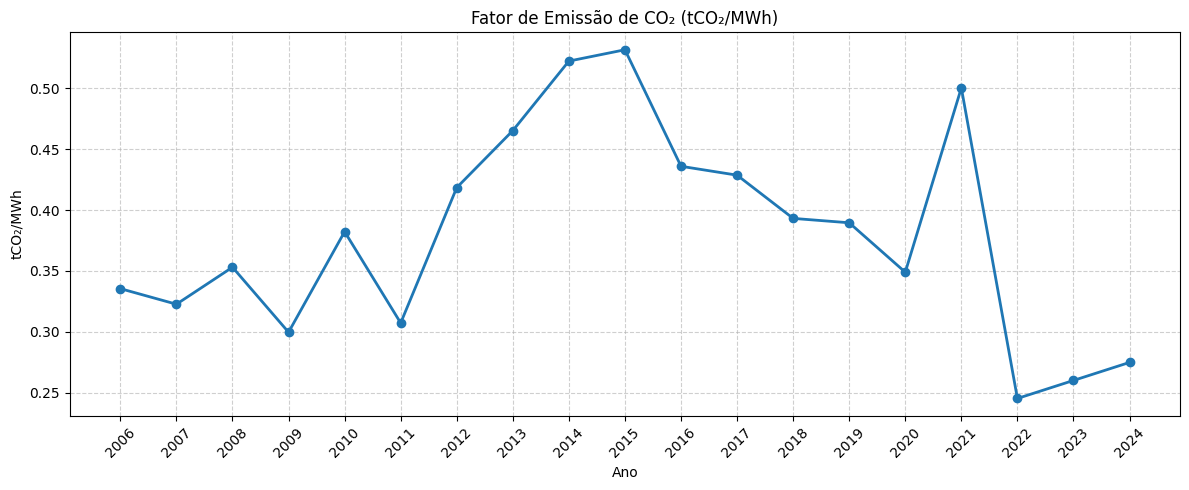

In [ ]:
# Plotar o gráfico dos fatores de emissao
plt.figure(figsize=(12,5))
plt.plot(df["ano"], df["fator_emissao_tCO2_MWh"], marker='o', linewidth=2)

# Configurações do gráfico
plt.xticks(df["ano"], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("Fator de Emissão de CO₂ (tCO₂/MWh)")
plt.xlabel("Ano")
plt.ylabel("tCO₂/MWh")
plt.tight_layout()

# Mostrar
plt.show()

Vamos usar também os [Dados do Consumo Mensal de Energia Elétrica
](https://www.epe.gov.br/pt/publicacoes-dados-abertos/dados-abertos/dados-do-consumo-mensal-de-energia-eletrica)  

Para usarmos esses dados vamos precisamos somar o consumo mensal para termos a realação de consumo anual

In [34]:
# Ler o arquivo
arquivo = "input/Dados_abertos_Consumo_Mensal.xlsx"
df = pd.read_excel(arquivo, dtype={"Data": str})

# Garantir que a coluna Consumo é numérica
df["Consumo"] = df["Consumo"].astype(float)

# Extrair o ano da coluna Data (AAAAmmdd → AAAA)
df["ano"] = df["Data"].str[:4].astype(int)

# Filtrar de 2006 a 2024
df = df[(df["ano"] >= 2006) & (df["ano"] <= 2024)]

# Somar todos os consumos do ano
df_anual = (
    df.groupby("ano")["Consumo"]
      .sum()
      .reset_index()
      .rename(columns={"Consumo": "consumo_anual_MWh"})
)

# Salvar o CSV final
os.makedirs("input", exist_ok=True)
saida = "input/consumo_anual_MWh.csv"
df_anual.to_csv(saida, index=False)

print("Arquivo gerado:", saida)
print(df_anual.head(3))
print(df_anual.tail(3))


Arquivo gerado: input/consumo_anual_MWh.csv
    ano  consumo_anual_MWh
0  2006       3.561293e+08
1  2007       3.770311e+08
2  2008       3.884724e+08
     ano  consumo_anual_MWh
16  2022       5.095962e+08
17  2023       5.319826e+08
18  2024       5.617158e+08


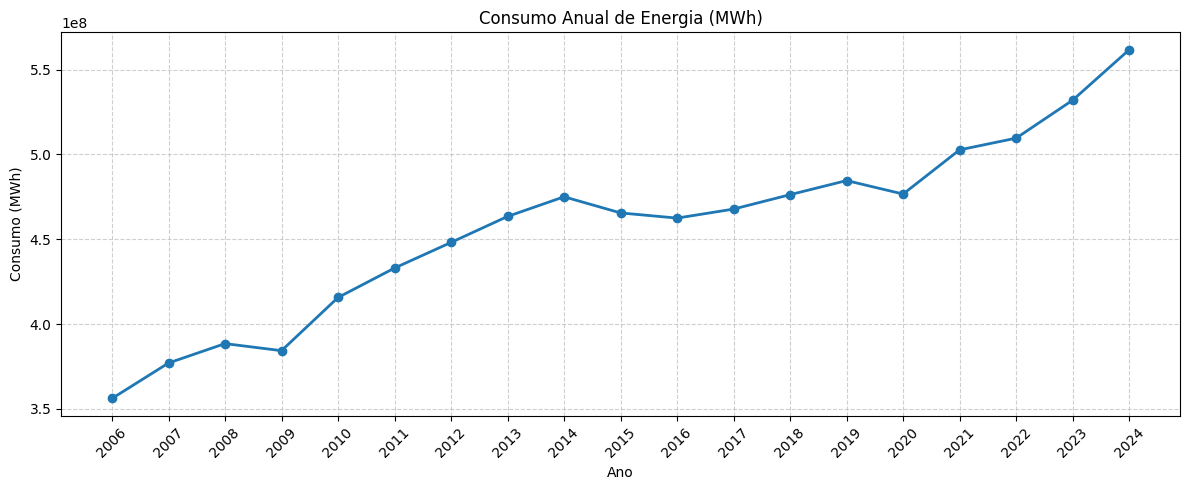

In [35]:
# Plotar o consumo anual
plt.figure(figsize=(12,5))
plt.plot(df_anual["ano"], df_anual["consumo_anual_MWh"], 
         marker='o', linewidth=2)

# Configurações do gráfico
plt.xticks(df_anual["ano"], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("Consumo Anual de Energia (MWh)")
plt.xlabel("Ano")
plt.ylabel("Consumo (MWh)")
plt.tight_layout()

# Mostrar
plt.show()

Agora vamos relacionar os Fatores de emissao de CO2 com o consumo anual, para sabermos a taxa de emissao de CO2 por ano 

In [43]:
# Carregar os arquivos
consumo = pd.read_csv("input/consumo_anual_MWh.csv")
fatores = pd.read_csv("input/fatores_emissao.csv")

# Garantir que a coluna 'ano' seja numérica
consumo["ano"] = consumo["ano"].astype(int)
fatores["ano"] = fatores["ano"].astype(int)

# Fazer o merge com base no ano
df_final = consumo.merge(fatores, on="ano", how="inner")

# Calcular a emissão anual em tCO2
df_final["emissao_tCO2"] = (
    df_final["consumo_anual_MWh"] * df_final["fator_emissao_tCO2_MWh"]
)

# Salvar o resultado final
df_final.to_csv("input/emissoes_anuais_2006_2024.csv", index=False)

print(df_final)

     ano  consumo_anual_MWh  fator_emissao_tCO2_MWh  emissao_tCO2
0   2006       3.561293e+08                  0.3355  1.194814e+08
1   2007       3.770311e+08                  0.3227  1.216679e+08
2   2008       3.884724e+08                  0.3531  1.371696e+08
3   2009       3.843064e+08                  0.2997  1.151766e+08
4   2010       4.156678e+08                  0.3823  1.589098e+08
5   2011       4.330156e+08                  0.3073  1.330657e+08
6   2012       4.481264e+08                  0.4185  1.875409e+08
7   2013       4.634420e+08                  0.4653  2.156395e+08
8   2014       4.750366e+08                  0.5224  2.481591e+08
9   2015       4.655229e+08                  0.5317  2.475185e+08
10  2016       4.624718e+08                  0.4360  2.016377e+08
11  2017       4.677885e+08                  0.4287  2.005409e+08
12  2018       4.762918e+08                  0.3932  1.872779e+08
13  2019       4.845990e+08                  0.3896  1.887998e+08
14  2020  

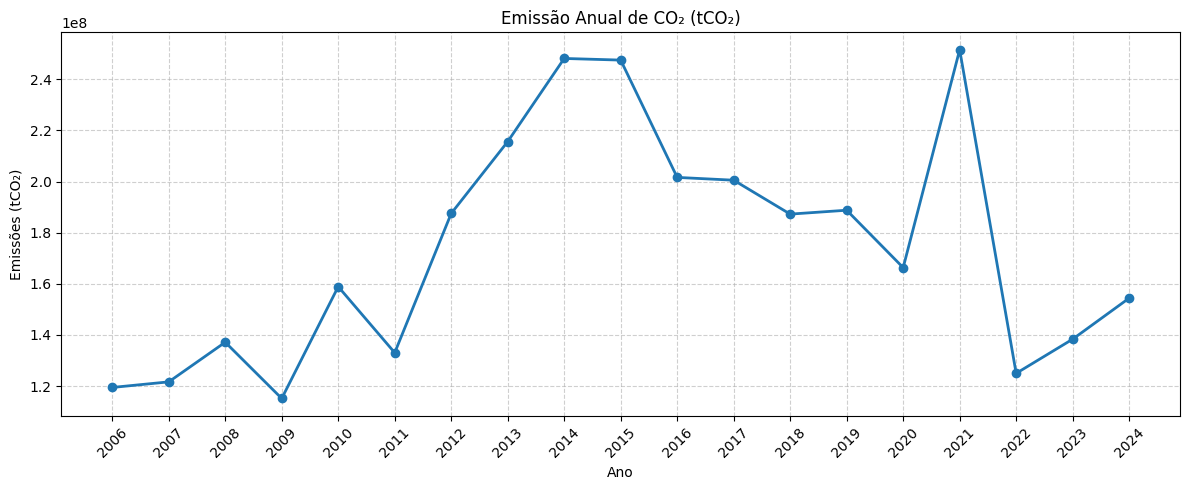

In [40]:
# Plotar a emissão anual
plt.figure(figsize=(12,5))
plt.plot(df_final["ano"], df_final["emissao_tCO2"], 
         marker='o', linewidth=2)

# Configurações do gráfico
plt.xticks(df_final["ano"], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.title("Emissão Anual de CO₂ (tCO₂)")
plt.xlabel("Ano")
plt.ylabel("Emissões (tCO₂)")
plt.tight_layout()

# Mostrar
plt.show()